# ObsID : 0945070132, SRCNUM : 1, Instru : EPN
**Simbad :** Gamma-ray Source (4FGL J0333.4-2705) https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%4016018930&Name=4FGL%20J0333.4-2705&submit=submit

## ESASky

https://sky.esa.int/esasky/?target=53.383375%20-27.15480555555556&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``

- Stack Catalogue name : 4XMMs J033331.9-270916
- IAU name : 4XMM J033331.9-270916
- RA : 03h 33m 31.917s
- DEC : -27° 09' 16.80"

``GAIA``

- Designation : Gaia DR3 5084568549147089792
- RA : 03h 33m 31.933s
- DEC : -27° 09' 16.53"
- Parallax : 0.1954 mas
- G : 19.9017

``eROSITA``

- IAUNAME : 1eRASS J033331.8-270916
- RA : 03h 33m 31.807s
- DEC : -27° 09' 16.29"

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [4]:
Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files

In [5]:
AllData.clear()
spec = Spectrum(glob.glob("P*PNS*SRSPEC*.FTZ")[0])


1 spectrum  in use
 
Spectral Data File: P0945070132PNS003SRSPEC0001.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.097e-01 +/- 3.006e-03 (94.8 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-34
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.29e+04 sec
 Using fit statistic: chi
 Using Background File                P0945070132PNS003BGSPEC0001.FTZ
  Background Exposure Time: 1.29e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY6.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0945070132PNS003SRCARF0001.FTZ



In [4]:
n_cts = 1.097e-01*1.29e+04

print("Number of counts =",n_cts)

if int(n_cts)<100:
    print()
    print("The low number of counts indicates that we should consider using cstat fit statistic instead of chi statistic.")

Number of counts = 1415.13


## Plot spectrum

In [6]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
#Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")
spec.ignore("**-0.2 12-**")

      No channels ignored (no channels in specified range)
    23 channels (12,34) ignored in spectrum #     1



(-0.5, 860.5, 664.5, -0.5)

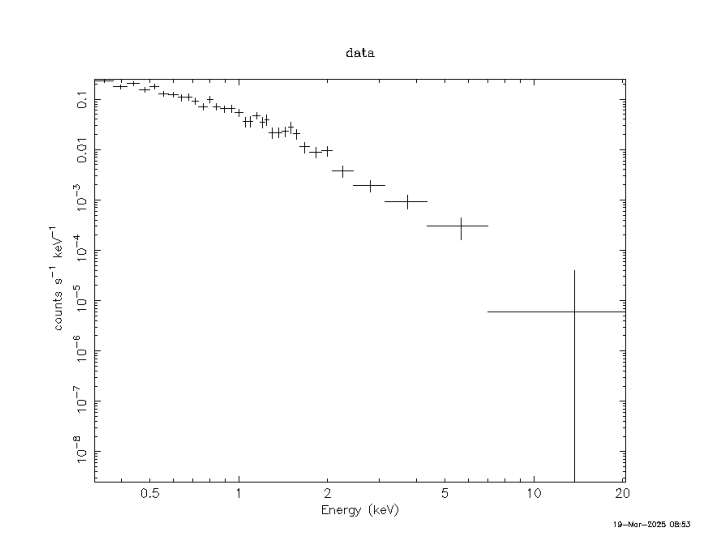

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [7]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared                474374.1     using 11 bins.

Test

(-0.5, 857.5, 656.5, -0.5)

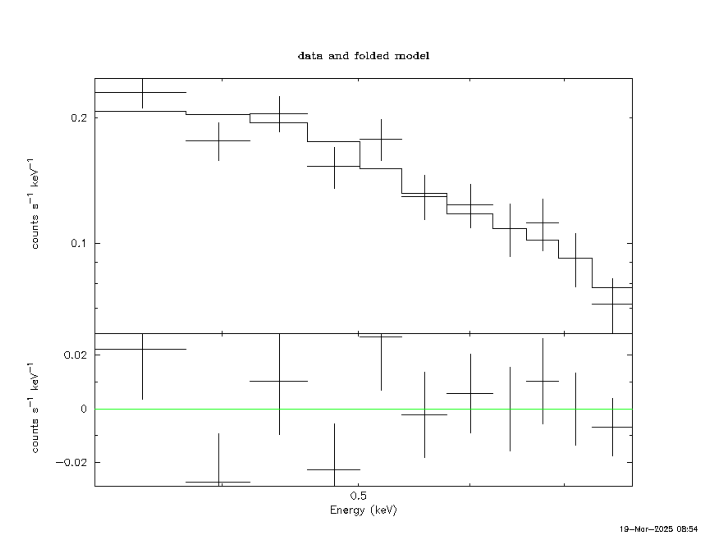

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [8]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]

 -3       22.6014     0.0891559   5.37368e+06
8.5293       1.01235      -3       22.6078     0.0891372   5.40925e+06
8.52921      1.36856      -3       22.6141     0.0891210   5.44174e+06
 Variances and Principal Axes
                 1        2        3  
 5.0000E-01| -0.0027   1.0000   0.0000  
 1.1078E+00|  1.0000   0.0027  -0.0000  
 2.6080E+15| -0.0000   0.0000  -1.0000  
----------------------------------------

  Covariance Matrix
        1           2           3   
   8.964e+01  -2.468e-01   4.805e+08
  -2.468e-01   6.994e-04  -1.348e+06
   4.805e+08  -1.348e+06   2.608e+15
------------------------------------

Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    22.6141      +/-  9.46805      
   2    2   bbody      kT         keV      8.91210E-02  +/-  2.64463E-02  
   3    2   bbody      norm                5.44174E+06  +/-  5.10690E+07  
_____________________________________

(-0.5, 851.5, 655.5, -0.5)

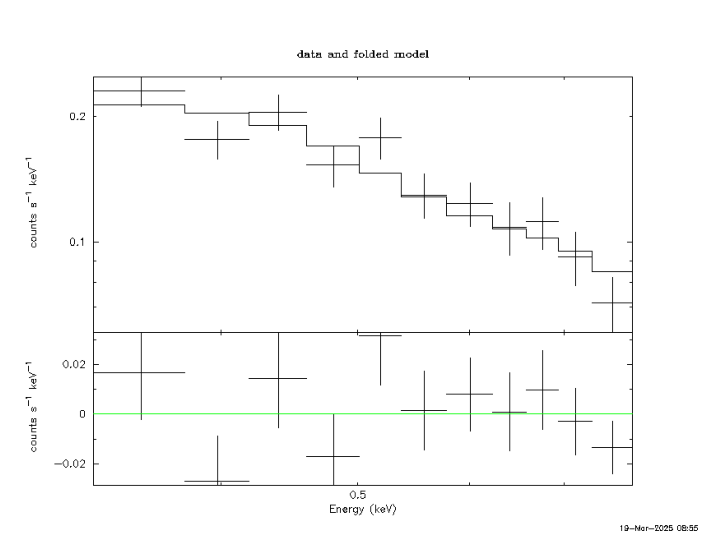

In [10]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [9]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]

946982    -2       14.2352      0.144372   1.51290e+07
9.75539      0.0856415    -2       14.2454      0.144299   1.52983e+07
9.75504      0.0478921    -3       14.3497      0.143597   1.69786e+07
9.72667      165.881      -3       14.4442      0.142916   1.88584e+07
9.69645      168.737      -3       14.5383      0.142263   2.08994e+07
9.66745      164.301      -3       14.6298      0.141625   2.31197e+07
9.63998      158.683      -3       14.7206      0.141004   2.55347e+07
9.61188      155.586      -3       14.8191      0.140493   2.79783e+07
9.58838      138.94       -3       14.8926      0.139867   3.07460e+07
9.56386      144.582      -3       14.9773      0.139291   3.37678e+07
9.53992      141.541      -3       15.0616      0.138734   3.70269e+07
9.51714      138.684      -3       15.1450      0.138188   4.05569e+07
9.49412      136.405      -3       15.2271      0.137661   4.43331e+07
9.47319      130.493      -3       15.3077      0.137137   4.84302e+07
9.452        129.988  

(-0.5, 860.5, 656.5, -0.5)

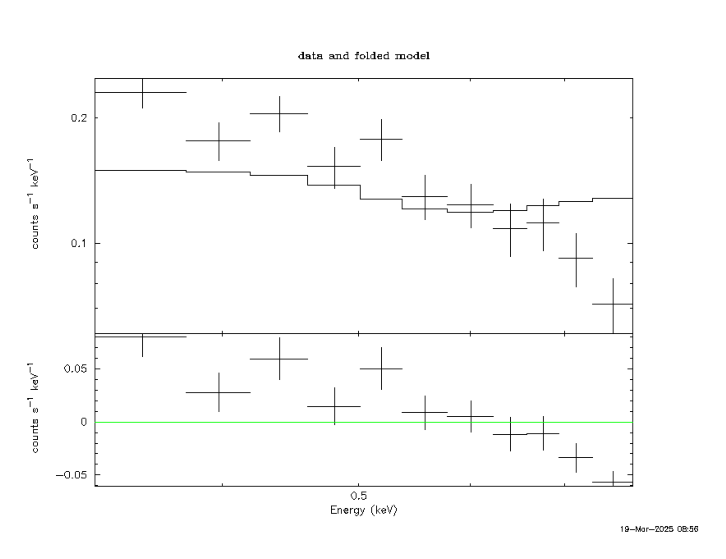

In [12]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [10]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.629371e+06     using 11 bins.

Test statistic : Chi-Squared              1.629371e+06     using 11 bins.
 Null hypothesis probability of 0.000000e+00 with 8 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
188.056      77.3922       0       1.06846     0.0186649     0.0171980
166.012      2059.72      -1       1.50044     -0.640781     0.0177265
98.7579      5339.7       -1       2.12659     -0.682546     0.0181984

(-0.5, 852.5, 656.5, -0.5)

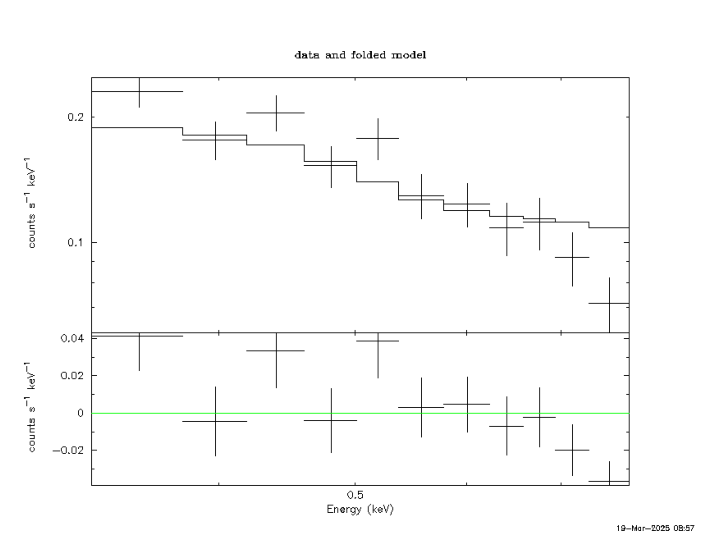

In [14]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :**

- RA =  53.3829856°
- Dec = -27.1546672°

53.38 -27.15

**Column density :** nH = 4*10^20 cm^-2

In [15]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"(tbabs) : {nH_bbody*10**22}")
print()
print(color.BOLD+"bremss"+color.END)
print(f"(tbabs) : {nH_bremss*10**22}")
print()
print(color.BOLD+"apec"+color.END)
print(f"(tbabs) : {nH_apec*10**22}")
print()
print(color.BOLD+"powerlaw"+color.END)
print(f"(tbabs) : {nH_powerlaw*10**22}")

The different models give a column density of :

bbody
(tbabs) : 2.261414672003796e+23

bremss
(tbabs) : 1.5515409059852797e+23

apec
(tbabs) : 2.9106215324848623e+22

powerlaw
(tbabs) : 8.251934604703474e+22


## Flux
### X-ray flux

In [11]:
AllModels.calcFlux(".2 12.0")

 Model Flux  0.025662 photons (9.2581e-11 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [12]:
Flux = 9.2581e-11 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END+f"F_X = {Flux} ergs/cm^2/s")

X-ray flux : F_X = 9.2581e-11 ergs/cm^2/s


### Optical flux

In [13]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)

G = 19.9017

F = F_optical(G)

print(color.BOLD+"Optical  flux : "+color.END+f"F_opt = {F} ergs/cm^2/s")

Optical  flux : F_opt = 1.1495008561535016e-13 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [14]:
print(color.BOLD+"X-ray flux / Optical flux ratio : "+color.END+f"F_x-ray/F_optical = {Flux/F}")
print(f"F_x-ray = {Flux/F}*F_optical")

X-ray flux / Optical flux ratio : F_x-ray/F_optical = 805.4017489799672
F_x-ray = 805.4017489799672*F_optical


## Luminosity

In [15]:
"""GAIA"""

P_mas = 0.1954
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosité : {Luminosity} erg/s")

(GAIA)
Distance : 1.5791709314227227e+22 cm
Luminosité : 2.9012824684829007e+35 erg/s
